In [1]:
import os, glob
import os.path as P
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import cv2
from sklearn.decomposition import PCA

In [2]:
train_files = ['data/' + str(i) + '_' + str(j) + '.png' for i in range(1, 41) for j in range(1, 10)]
test_files = ['data/' + str(i) + '_10.png' for i in range(1, 41)]

train_X = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in train_files]
train_Y = [i for i in range(1,41) for j in range(9)]
test_X = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in test_files]
test_Y = [i for i in range(1,41)]

train_X = np.array(train_X).reshape(360, -1)
train_Y = np.array(train_Y)
test_X = np.array(test_X).reshape(40, -1)
test_Y = np.array(test_Y)

In [3]:
train_X.shape

(360, 2576)

### Problem 1

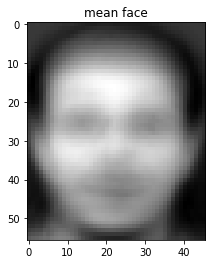

In [5]:
mean_face = train_X.mean(axis=0)
plt.title("mean face")
plt.imshow(mean_face.reshape(56,46), cmap='gray')
plt.show()

In [6]:
pca = PCA()
output = pca.fit(train_X - mean_face)
output.components_.shape

(360, 2576)

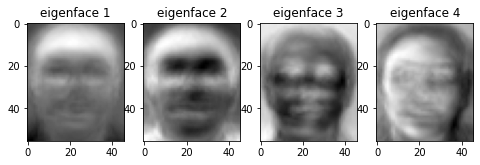

In [9]:
eigen = []
for i in range(4):
    eigen.append((output.components_[i]).reshape(56,46))
    
plt.figure(figsize=(8,6))
for i, e in enumerate(eigen):
    plt.subplot(1,4,i+1)
    plt.imshow(e,cmap='gray')
    plt.title(f"eigenface {i+1}")

### Problem 2

(1, 2576)


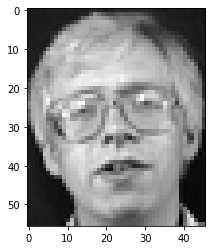

In [10]:
img = cv2.imread('data/2_1.png', cv2.IMREAD_GRAYSCALE).reshape(1, -1)
print(img.shape)
plt.imshow(img.reshape(56,46), cmap='gray')
plt.show()

In [11]:
eigenspace = pca.transform(img - mean_face)
print(eigenspace.shape)

(1, 360)


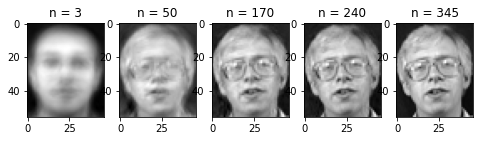

In [12]:
plt.figure(figsize=(8,6))
for i, n in enumerate([3, 50, 170, 240, 345]):
    # mean + eigenface * test_weight
    # eigenspace: 1*n
    # output.components_: n*2576
    reconstruct = mean_face + np.dot(eigenspace[:,:n], output.components_[:n])
    plt.subplot(1,5,i+1)
    plt.imshow(reconstruct.reshape(56,46), cmap='gray')
    plt.title("n = " + str(n))

### Problem 3

In [141]:
#mse

for i, n in enumerate([3, 50, 170, 240, 345]):
    # mean + eigenface * test_weight
    reconstruct = mean_face + np.dot(eigenspace[:,:n], output.components_[:n])
    mse = np.mean((img - reconstruct)**2)
    print('n=', n, ', mse:', mse)

n= 3 , mse: 746.7994084720323
n= 50 , mse: 236.55430882685195
n= 170 , mse: 46.71704972752627
n= 240 , mse: 13.366611255635421
n= 345 , mse: 0.21543397076007192


### Problem 4

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [14]:
# k = 1, 3, 5
# n = 3, 50, 170
trainsform_X = pca.transform(train_X - mean_face)
for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    print('------- k =', k, '-------')
    for n in [3, 50, 170]:
        scores = cross_val_score(knn,X=trainsform_X[:, :n],y=train_Y,cv=3,scoring='accuracy')
        print('n =', n, ' , acc:', scores.mean())
    print()

------- k = 1 -------
n = 3  , acc: 0.65
n = 50  , acc: 0.9611111111111111
n = 170  , acc: 0.9555555555555556

------- k = 3 -------
n = 3  , acc: 0.6111111111111112
n = 50  , acc: 0.9
n = 170  , acc: 0.8888888888888888

------- k = 5 -------
n = 3  , acc: 0.5611111111111111
n = 50  , acc: 0.8472222222222222
n = 170  , acc: 0.8222222222222223



### Problem 5

In [15]:
transform_test_X = pca.transform(test_X - mean_face)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(trainsform_X[:, :50], train_Y)
predict = knn.predict(transform_test_X[:,:50])

In [16]:
acc = sum(predict==test_Y)/len(test_Y)
print('acc in testing data:', acc)

acc in testing data: 0.925
